# Customer Segmentation & Customer Profiling

<b>Proses Customer Segmentation</b>

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Get the Dataset
df = pd.read_excel("default of credit card clients.xls")

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# No missing values
# Already in numerical form
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [6]:
# Descriptive Statistics
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<b>Pengecekan fitur</b>

In [7]:
# Menemukan relasi antar fitur
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


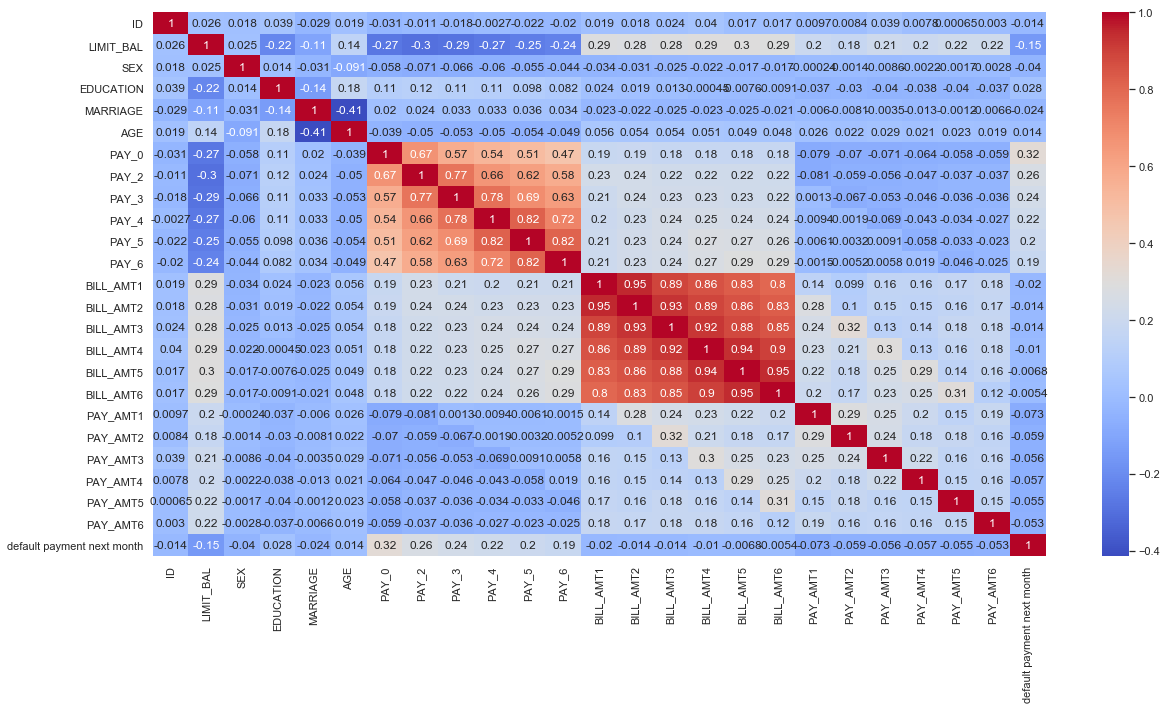

In [8]:
plt.figure(figsize=(20,10))
sns.set()
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [ ]:
# Correlation is decreasing with distance between months. Lowest correlations are between Sept-April
# There are no correlations between amounts of previous payments for April-Sept 2005.
# Correlation is decreasing with distance between months. Lowest correlations are between Sept-April

<b>Distribusi fitur numerik</b>

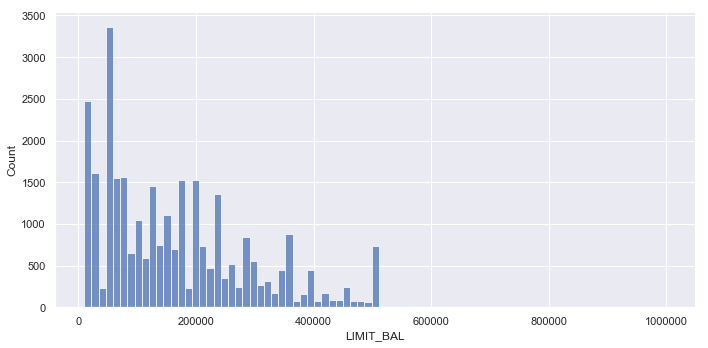

In [13]:
# Distribusi limit balance setiap nasabah dengan bentuk grafik skew ke kanan
# Jumlah nasabah lebih banyak berada pada kondisi LIMIT_BAL rendah
sns.set()
sns.displot(df['LIMIT_BAL'],height=5,aspect=2)

In [14]:
df['LIMIT_BAL'].value_counts().shape

(81,)

In [15]:
# 50K largest group of amount credit limit
df['LIMIT_BAL'].value_counts().sort_values()

327680        1
760000        1
1000000       1
690000        1
16000         2
780000        2
800000        2
730000        2
740000        2
660000        3
720000        3
670000        3
650000        3
750000        4
680000        4
710000        6
590000        6
540000        6
630000        7
640000        7
570000        8
700000        8
620000        9
560000       10
530000       10
610000       11
580000       11
600000       16
510000       19
520000       20
           ... 
320000      312
290000      348
250000      350
220000      469
10000       493
280000      493
260000      521
170000      532
300000      554
110000      588
240000      619
90000       651
160000      694
500000      722
120000      726
130000      729
210000      730
70000       731
230000      737
140000      749
60000       825
360000      881
180000      995
100000     1048
150000     1110
200000     1528
80000      1567
30000      1610
20000      1976
50000      3365
Name: LIMIT_BAL, Length:

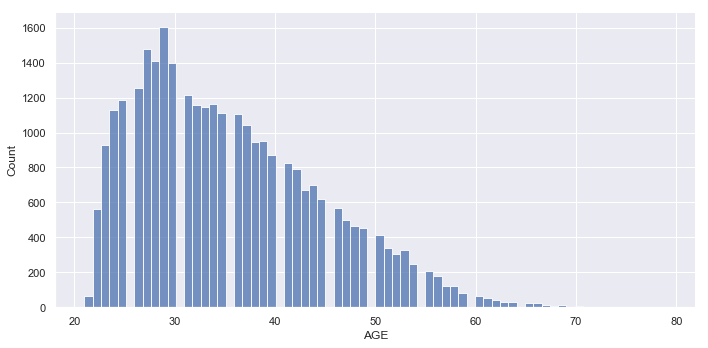

In [17]:
# Distribusi nasabah berdasarkan usia berbentuk skew kanan dimana mayoritas
# berada di sebelah kiri (20-40). Masuk akal karena usia produktif
sns.set()
sns.displot(df['AGE'],height=5,aspect=2)

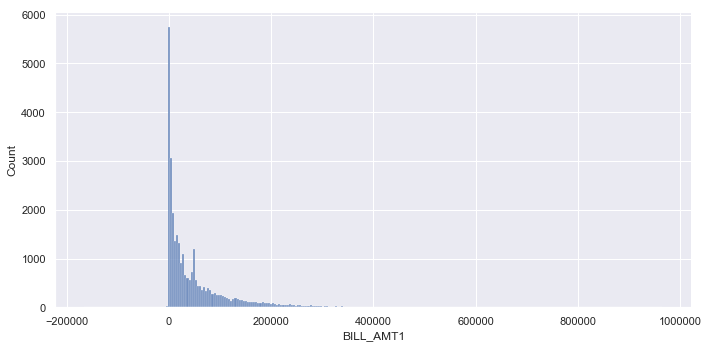

In [19]:
# Distribusi Jumlah Billing bulan September berbentuk skew kanan
# Hal ini mengindikasikan jumlah orang dengan BILL_AMT1 tinggi jauh lebih sedikit
# Bentuk distribusi yang kurang lebih sama terjadi juga pada BILL_AMT periode 
# berikut-berikutnya
sns.set()
sns.displot(df['BILL_AMT1'],height=5,aspect=2)

In [22]:
df['BILL_AMT1'].value_counts().sort_values()

 56119        1
 47864        1
 54021        1
 49911        1
 27378        1
 29425        1
 129776       1
 43062        1
 194670       1
 15575        1
 41891        1
 21237        1
 127510       1
 240394       1
 41739        1
 54053        1
 58147        1
 50511        1
 799          1
 13033        1
 2846         1
 66979        1
 62209        1
 8920         1
 6156         1
 10250        1
 378886       1
 380933       1
 47385        1
 24579        1
           ... 
 632         13
 150         14
 300         14
 325         14
 200         14
-1           16
 1000        16
-4           16
 360         17
-2           17
 600         18
 291         19
-3           19
 264         20
 836         21
-200         22
-5           22
 1261        22
 1473        24
 1050        25
 500         25
 416         29
 2400        39
 396         49
 2500        59
 316         63
 326         72
 780         76
 390        244
 0         2008
Name: BILL_AMT1, Length:

In [25]:
df['BILL_AMT1'].values.max()

964511

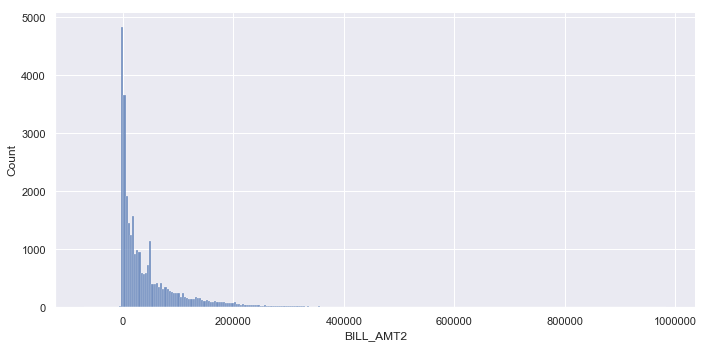

In [27]:
sns.set()
sns.displot(df['BILL_AMT2'],height=5,aspect=2)

In [28]:
df['BILL_AMT2'].values.max()

983931

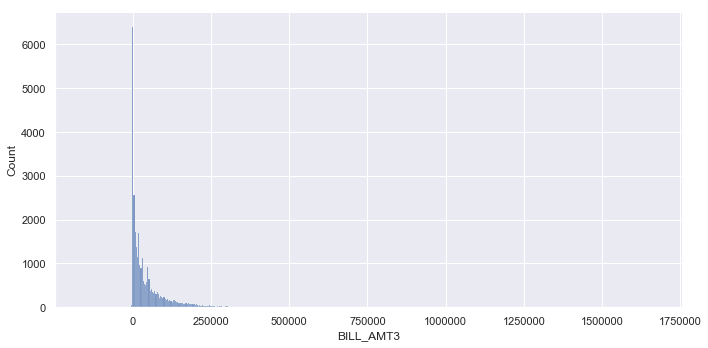

In [29]:
sns.set()
sns.displot(df['BILL_AMT3'],height=5,aspect=2)

In [30]:
df['BILL_AMT3'].values.max()

1664089

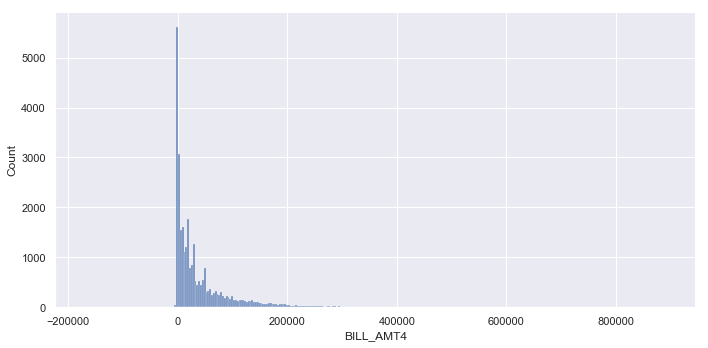

In [32]:
sns.set()
sns.displot(df['BILL_AMT4'],height=5,aspect=2)

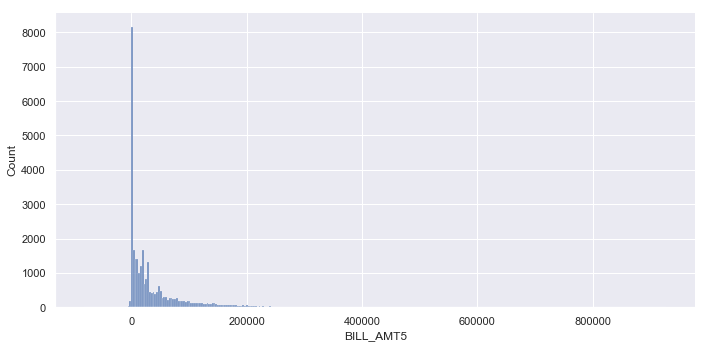

In [33]:
sns.set()
sns.displot(df['BILL_AMT5'],height=5,aspect=2)

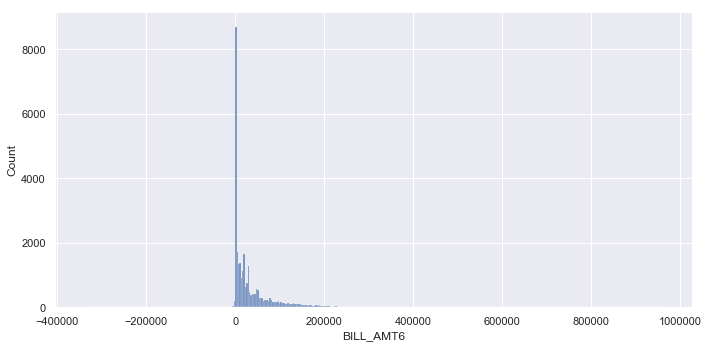

In [34]:
sns.set()
sns.displot(df['BILL_AMT6'],height=5,aspect=2)

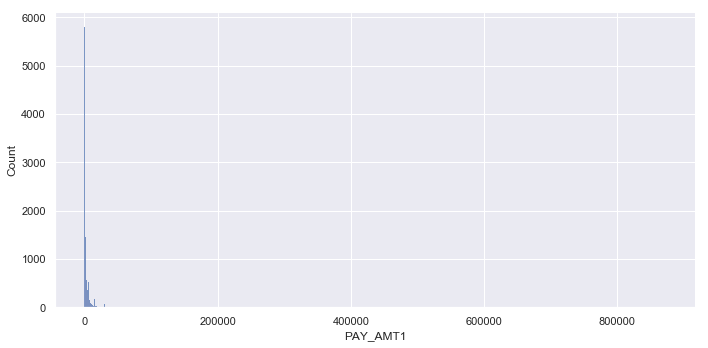

In [35]:
# Distribusi jumlah bayar nasabah berbentuk skew kanan
# Hal yang sama terjadi juga pada PAY_AMT periode berikut-berikutnya
sns.set()
sns.displot(df['PAY_AMT1'],height=5,aspect=2)

In [36]:
df['PAY_AMT1'].values.max()

873552

In [37]:
df['PAY_AMT1'].value_counts().sort_values()

26111       1
5923        1
7970        1
36348       1
6237        1
16088       1
7954        1
38621       1
94          1
53000       1
8266        1
8002        1
12360       1
2111        1
22581       1
8250        1
57210       1
10101       1
6003        1
8050        1
10299       1
2095        1
6205        1
20328       1
8034        1
1889        1
62          1
5971        1
2127        1
1873        1
         ... 
11000      68
2300       70
6500       70
9000       80
20000      80
3200       84
15000      97
1400       97
2200      108
4500      108
2100      129
1200      136
1700      157
1800      167
1600      174
8000      176
1300      184
3500      185
7000      195
390       207
6000      294
2500      298
1000      365
10000     401
4000      426
1500      507
5000      698
3000      891
2000     1363
0        5249
Name: PAY_AMT1, Length: 7943, dtype: int64

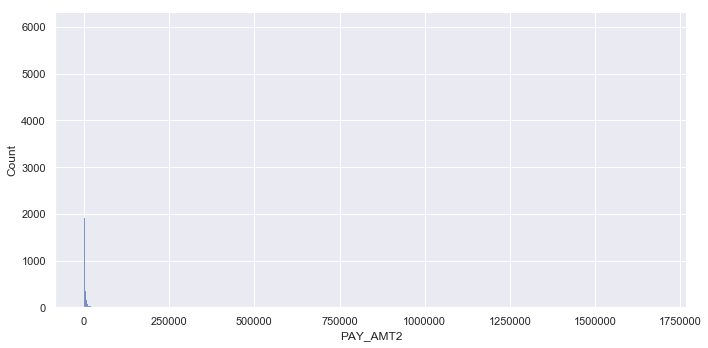

In [43]:
sns.set()
sns.displot(df['PAY_AMT2'],height=5,aspect=2)

In [39]:
df['PAY_AMT2'].values.max()

1684259

In [40]:
df['PAY_AMT1'].value_counts().sort_values()

26111       1
5923        1
7970        1
36348       1
6237        1
16088       1
7954        1
38621       1
94          1
53000       1
8266        1
8002        1
12360       1
2111        1
22581       1
8250        1
57210       1
10101       1
6003        1
8050        1
10299       1
2095        1
6205        1
20328       1
8034        1
1889        1
62          1
5971        1
2127        1
1873        1
         ... 
11000      68
2300       70
6500       70
9000       80
20000      80
3200       84
15000      97
1400       97
2200      108
4500      108
2100      129
1200      136
1700      157
1800      167
1600      174
8000      176
1300      184
3500      185
7000      195
390       207
6000      294
2500      298
1000      365
10000     401
4000      426
1500      507
5000      698
3000      891
2000     1363
0        5249
Name: PAY_AMT1, Length: 7943, dtype: int64

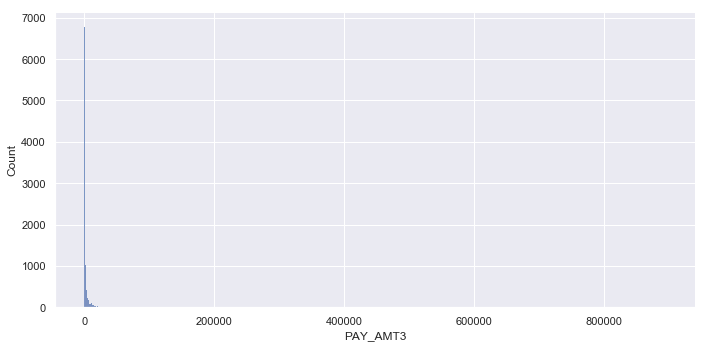

In [44]:
sns.set()
sns.displot(df['PAY_AMT3'],height=5,aspect=2)

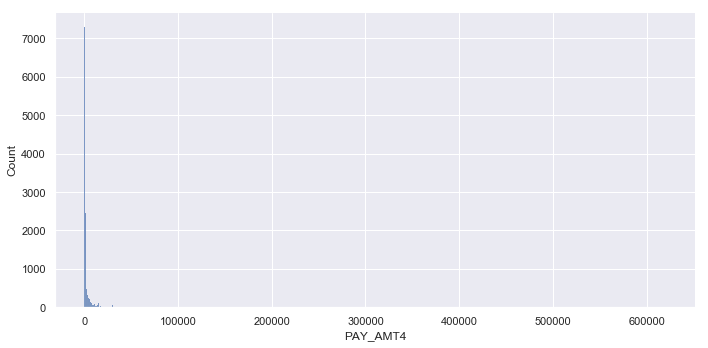

In [45]:
sns.set()
sns.displot(df['PAY_AMT4'],height=5,aspect=2)

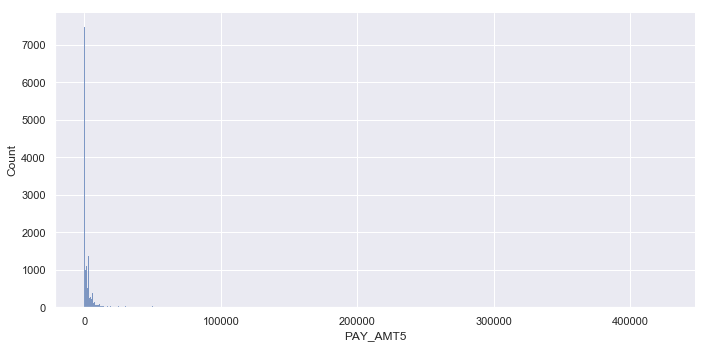

In [46]:
sns.set()
sns.displot(df['PAY_AMT5'],height=5,aspect=2)

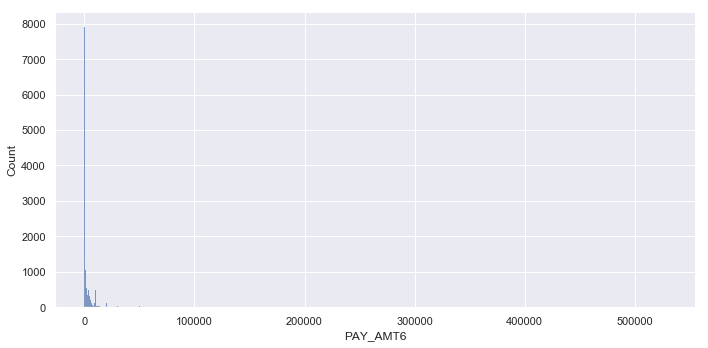

In [47]:
sns.set()
sns.displot(df['PAY_AMT6'],height=5,aspect=2)

<b>Distribusi Fitur Kategori</b>

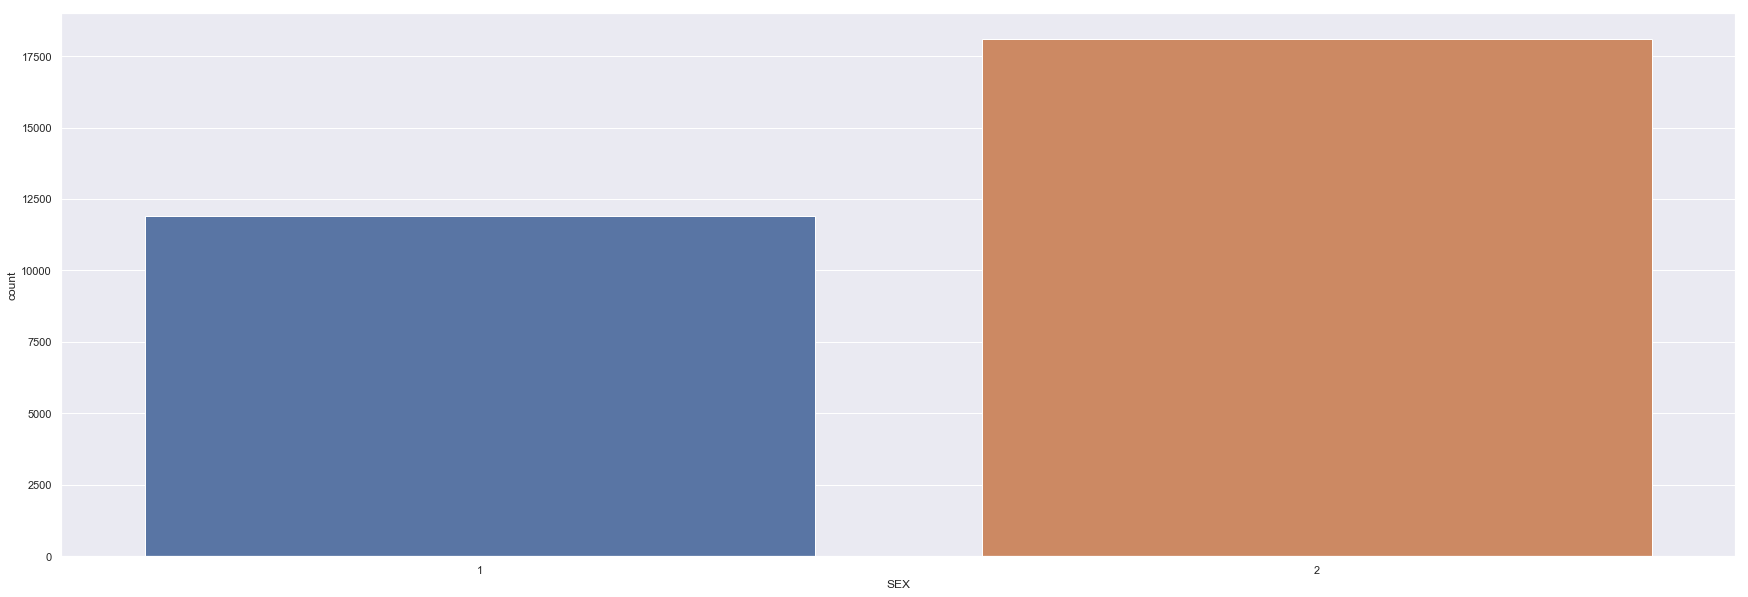

In [48]:
# Menghitung rasio Laki-laki=1 dan Perempuan=2
sns.set()
plt.figure(figsize=(30,10))
sns.countplot(x='SEX',data=df)

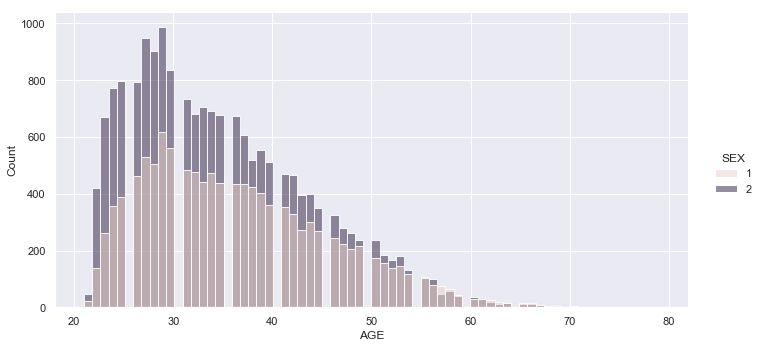

In [50]:
# Setiap jenis kelamin sama sama memiliki kurva skew kanan dengan mayoritas berada pada usia produktif
# late twenties until early fourties 
sns.set()
sns.displot(hue='SEX',x='AGE',data=df,height=5,aspect=2)

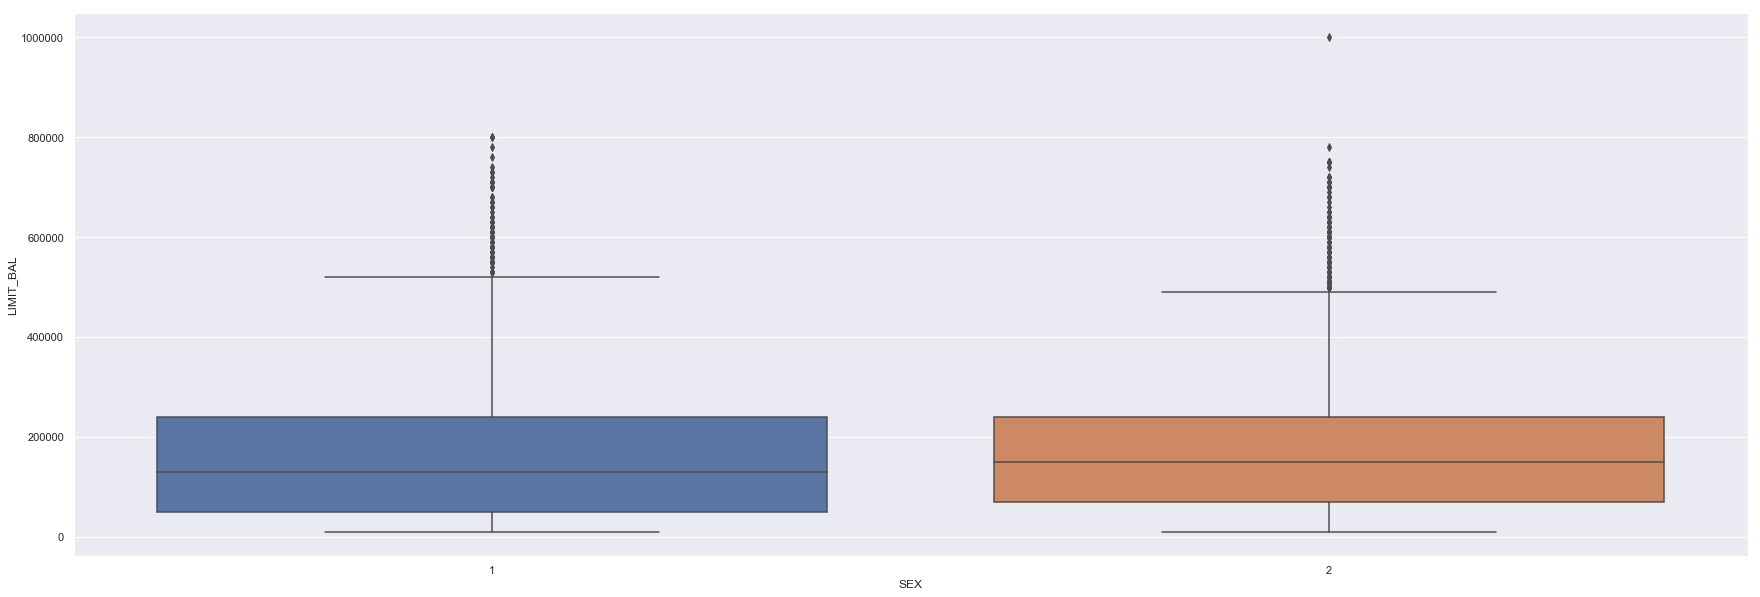

In [51]:
# Perempuan memiliki LIMIT_BAL sedikit lebih besar
sns.set()
plt.figure(figsize=(30,10))
sns.boxplot(x='SEX',y='LIMIT_BAL',data=df)

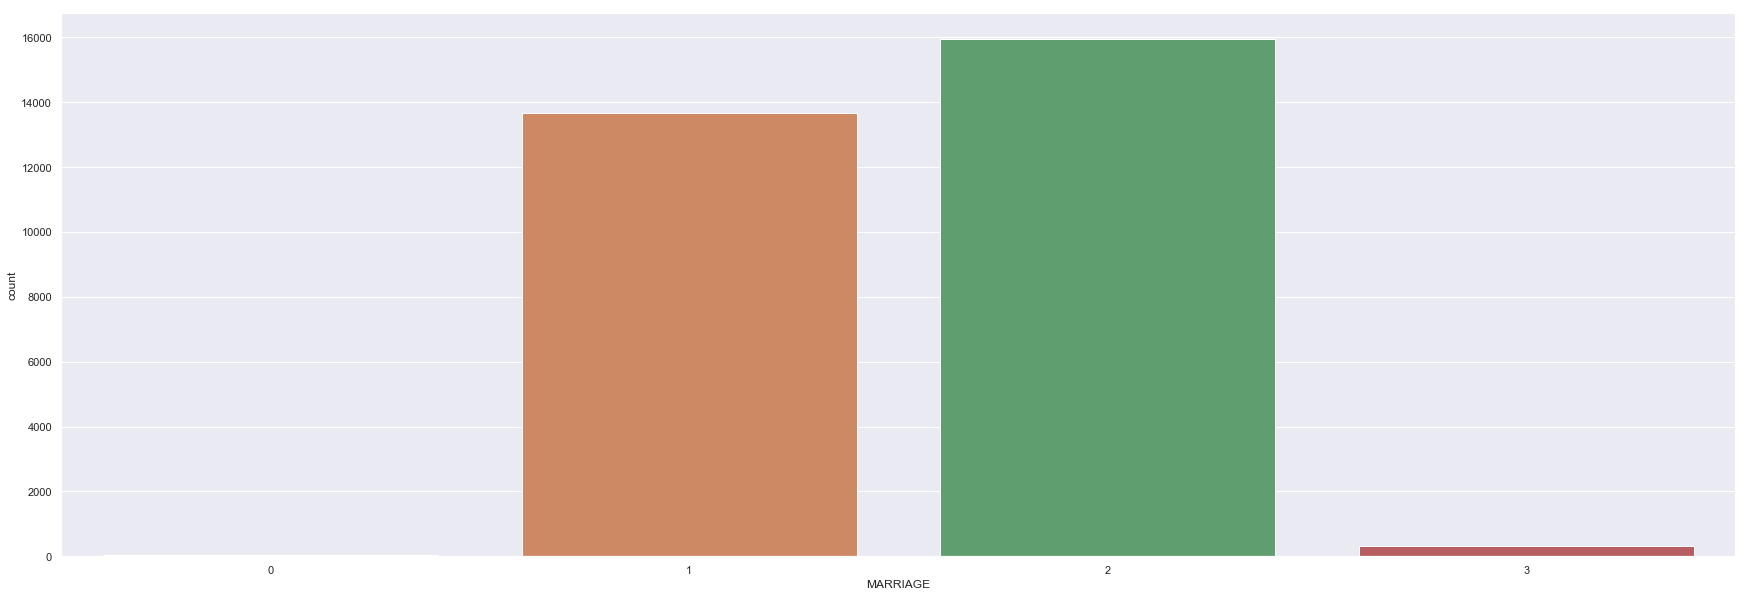

In [52]:
# Rasio kriteria pernikahan didominasi customer single ='2' dan menikah ='1'
sns.set()
plt.figure(figsize=(30,10))
sns.countplot(x='MARRIAGE',data=df)

In [63]:
# Kategori pernikahan 0 akan dilebur dengan 3
def converter(marriage):
    if marriage==0:
        return 3
    else:
        return marriage

In [64]:
df['NEW_MARRIAGE'] = df['MARRIAGE'].apply(converter)

In [65]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,NEW_MARRIAGE
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,2
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,2
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,1


In [66]:
df['NEW_MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: NEW_MARRIAGE, dtype: int64

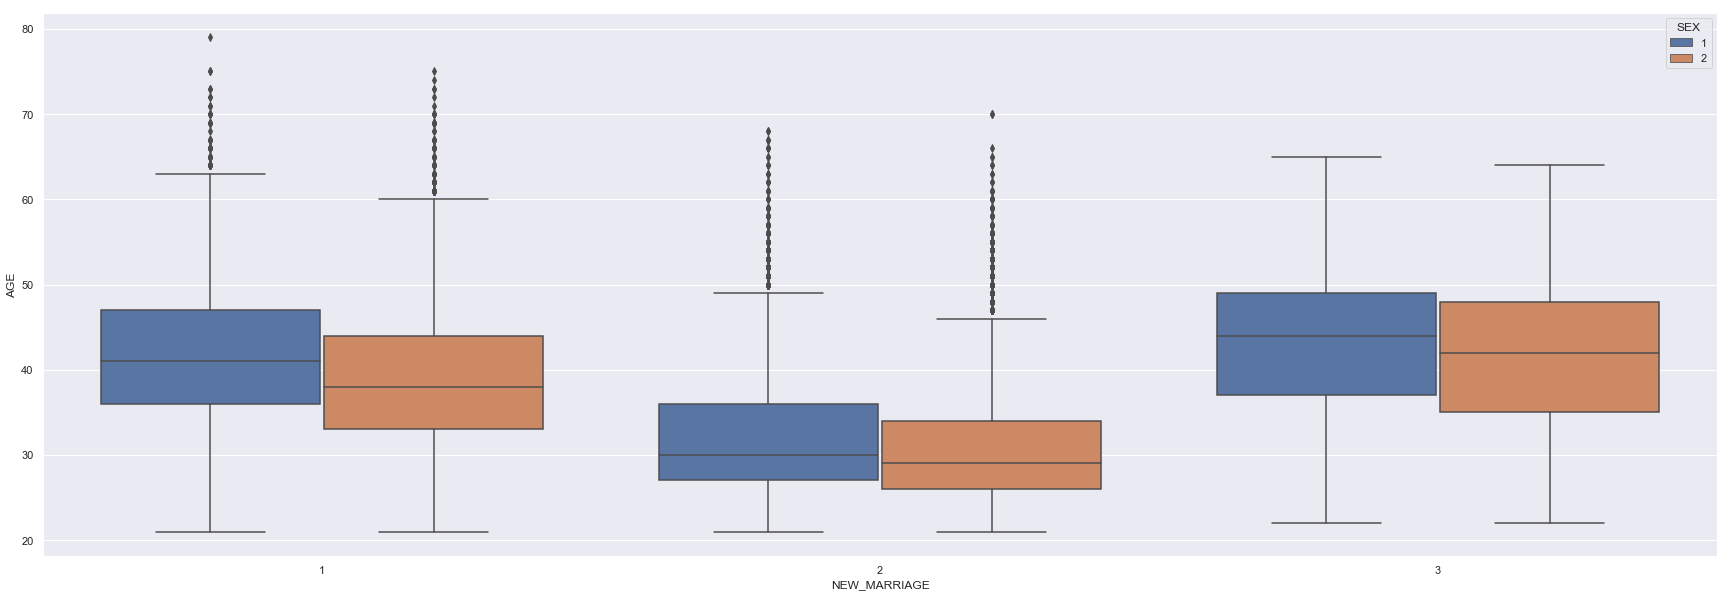

In [71]:
# Dalam setiap kategori pernikahan laki-laki cenderung sedikit lebih tua dibandingkan perempuan
# Dengan orang yang menikah memiliki usia yang lebih senior dibandingkan orang yang single
# Diantara semua kategori pernikahan orang dengan kategori others(janda/duda/dll) memiliki rentang usia yang paling senior
sns.set()
plt.figure(figsize=(30,10))
sns.boxplot(x='NEW_MARRIAGE',y='AGE',hue="SEX",data=df)

In [ ]:
# Single around 30, Marriage around 40
# Married males have mean age above married women. Unmarried males have mean value for age above unmarried 
# women as well but closer. Q3 abd Q4 values for married man are above corresponding values for married women.

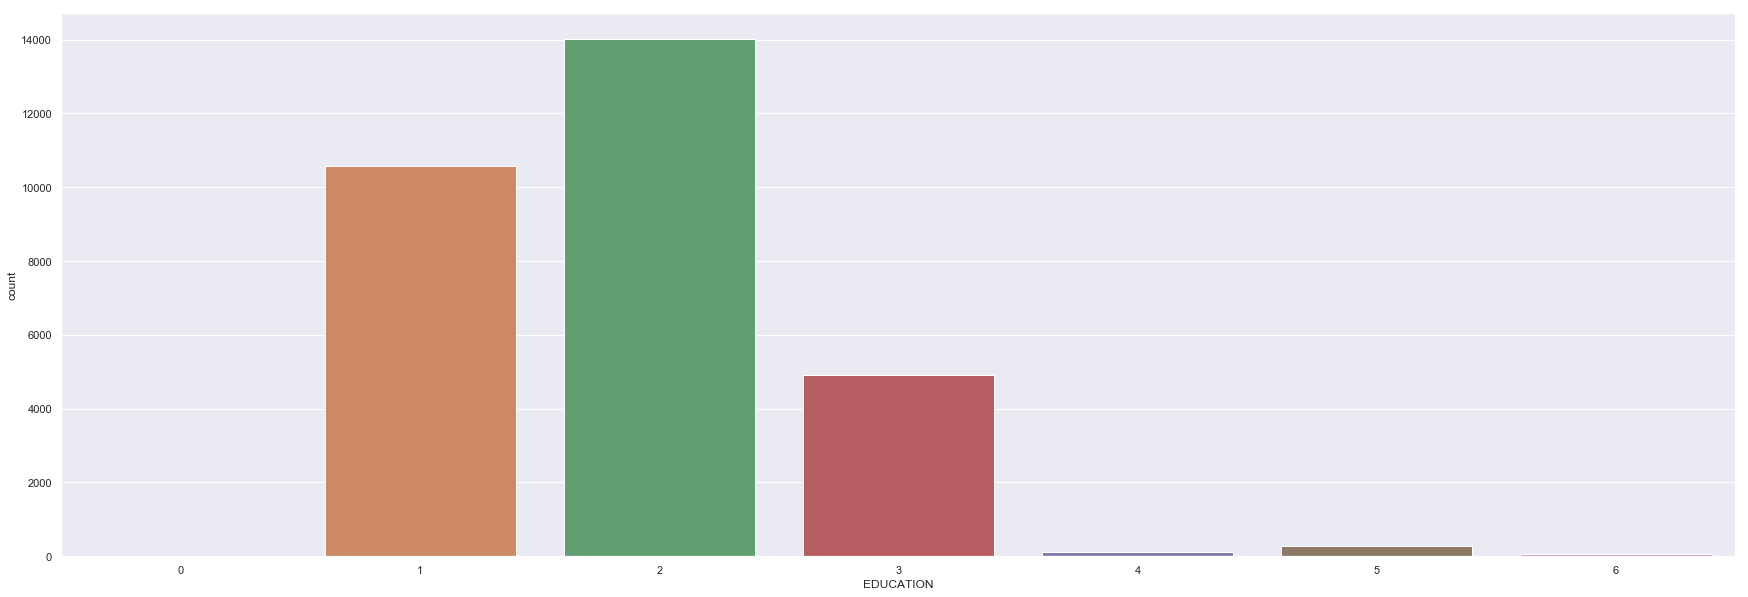

In [60]:
# Customer lulusan S1 ='2' mendominasi diikuti oleh lulusan S2='1' dan SMA='3'
sns.set()
plt.figure(figsize=(30,10))
sns.countplot(x='EDUCATION',data=df)

In [61]:
df['EDUCATION'].value_counts().sort_values()

0       14
6       51
4      123
5      280
3     4917
1    10585
2    14030
Name: EDUCATION, dtype: int64

In [67]:
# Kategori education 0,5,dan 6 akan dilebur dengan 4
def converter(education):
    if education==0 or education==5 or education==6:
        return 4
    else:
        return education

In [68]:
df['NEW_EDUCATION'] = df['EDUCATION'].apply(converter)

In [69]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,NEW_MARRIAGE,NEW_EDUCATION
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,1,2
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,2,2
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,2,2
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,1,2
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,1,2


In [70]:
df['NEW_EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: NEW_EDUCATION, dtype: int64

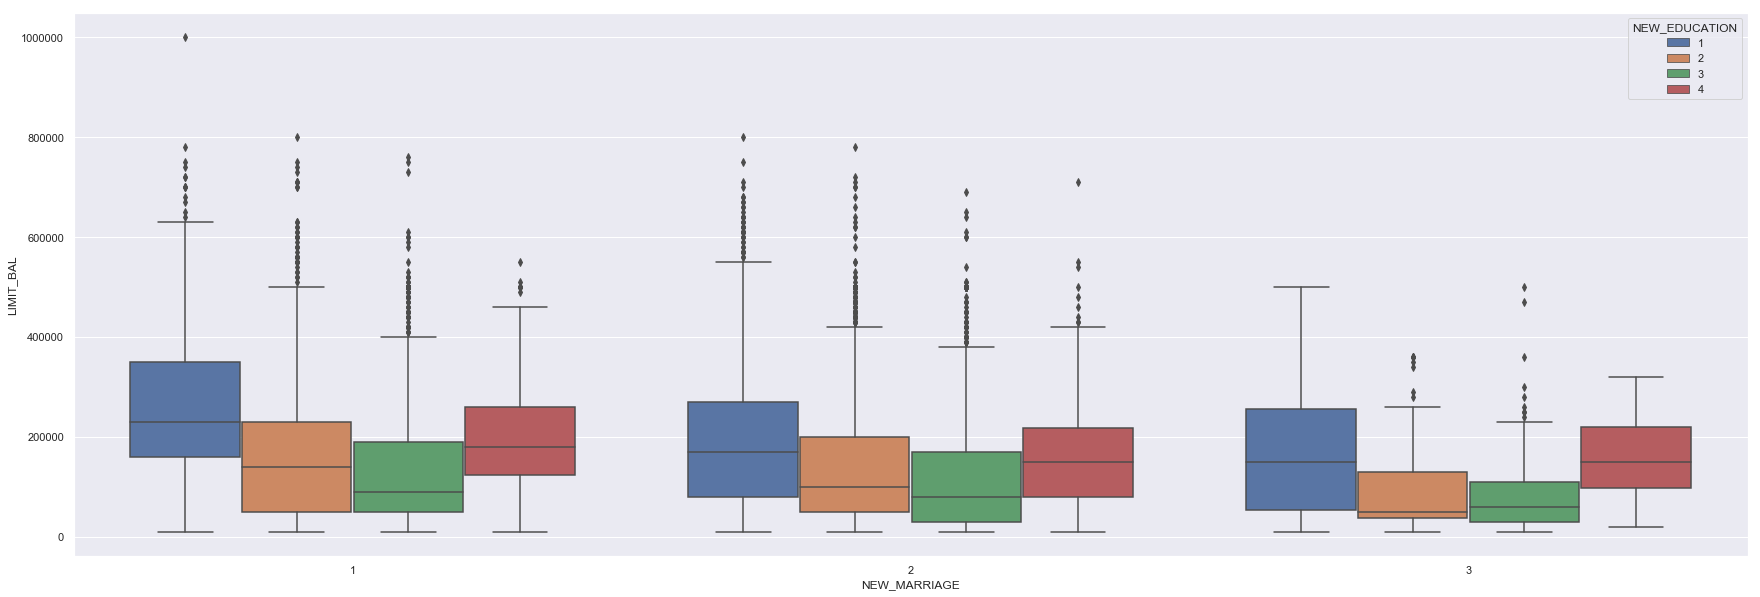

In [72]:
plt.figure(figsize=(30,10))
sns.boxplot(x='NEW_MARRIAGE',y='LIMIT_BAL',hue='NEW_EDUCATION',data=df)

In [ ]:
# Untuk setiap kategori pernikahan semakin tinggi tingkat pendidikan akan memiliki LIMIT_BAL lebih besar
# Dengan kategori NEW_EDUCATION 4 yang hampir menyamai lulusan S2

In [73]:
df_new = df.drop(['EDUCATION','MARRIAGE'],axis=1)

In [75]:
df_new.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,NEW_MARRIAGE,NEW_EDUCATION
0,1,20000,2,24,2,2,-1,-1,-2,-2,...,0,0,689,0,0,0,0,1,1,2
1,2,120000,2,26,-1,2,0,0,0,2,...,3261,0,1000,1000,1000,0,2000,1,2,2
2,3,90000,2,34,0,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,2,2
3,4,50000,2,37,0,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,1,2
4,5,50000,1,57,-1,0,-1,0,0,0,...,19131,2000,36681,10000,9000,689,679,0,1,2


<b>Melakukan Customer Segmentation dengan K-Means Clustering diawali dengan pemilihan nilai K dengan metode Elbow</b>

In [76]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
X = df_new.drop('default payment next month',axis=1)

In [79]:
X_scaled = scaler.fit_transform(X)

In [83]:
cluster_range = range(1,30)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X_scaled)
    cluster_errors.append(clusters.inertia_)

In [84]:
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:30]

,num_clusters,cluster_errors
0,1,720000.000000
1,2,598466.557447
2,3,518146.516427
3,4,487917.300365
4,5,464036.509639
5,6,443566.017860
6,7,427054.132568
7,8,412124.476466
8,9,401921.953307
9,10,389595.743396


Text(0, 0.5, 'WSS value')

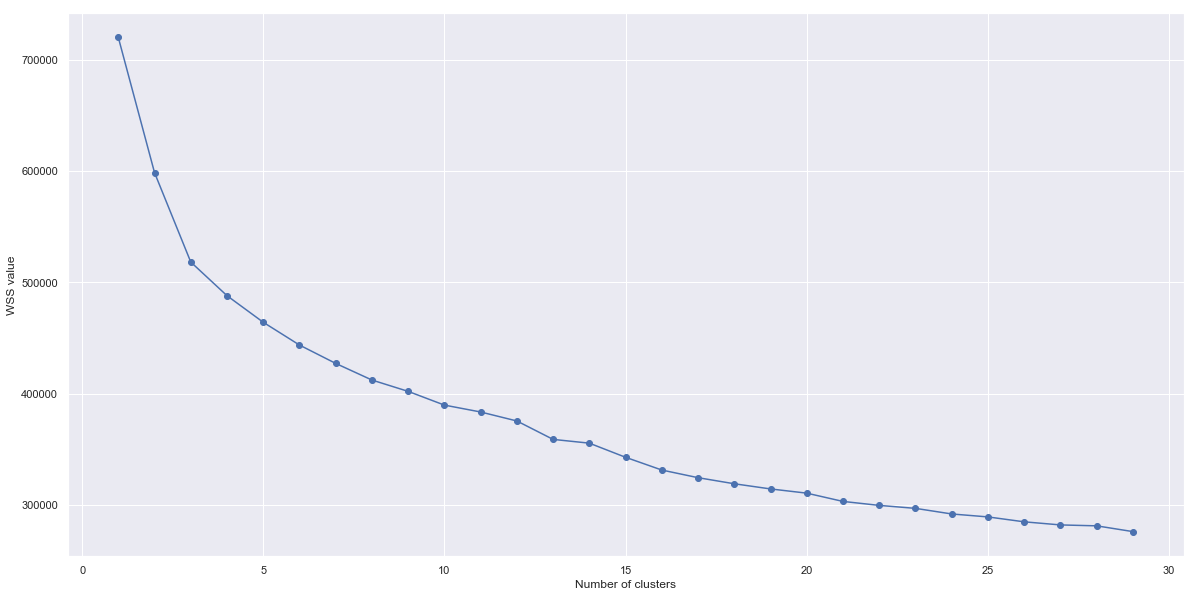

In [85]:
plt.figure(figsize=(20,10))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of clusters')
plt.ylabel('WSS value')

In [86]:
# Dipilih 3 sebagai nilai K 

<b>Melakukan clustering dengan K=3</b> 

In [87]:
kmeans = KMeans(n_clusters=3)

In [88]:
X = df_new.drop('default payment next month',axis=1)

In [89]:
X_scaled = scaler.fit_transform(X)

In [90]:
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

In [91]:
kmeans.cluster_centers_

array([[-0.00788109,  0.40959502,  0.08940018,  0.10153804, -0.66526151,
        -0.84646735, -0.88304138, -0.89368933, -0.88763987, -0.85219411,
        -0.5574749 , -0.58147199, -0.58032837, -0.57699835, -0.55886316,
        -0.54308858, -0.04789289, -0.02058149, -0.01018236,  0.00445963,
         0.00258948,  0.01788123, -0.08862416, -0.23476368],
       [-0.00936735, -0.47582391, -0.04427732, -0.10595132,  0.3878176 ,
         0.49551824,  0.51847779,  0.52192301,  0.51077197,  0.48210081,
        -0.08899311, -0.08631248, -0.09083131, -0.10011424, -0.10688908,
        -0.10637747, -0.11571653, -0.10137263, -0.12289973, -0.12553187,
        -0.12317445, -0.1181545 ,  0.08220153,  0.17533307],
       [ 0.06393727,  0.89070342, -0.06636929,  0.16825842,  0.23855252,
         0.29448814,  0.30043103,  0.31633896,  0.34754258,  0.36988331,
         2.01190442,  2.07000791,  2.08645897,  2.11739994,  2.09427649,
         2.04612961,  0.64587844,  0.50361197,  0.56757389,  0.5364835 ,
  

In [92]:
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1])

In [93]:
df_new['Cluster'] = kmeans.labels_

In [94]:
df_new.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,NEW_MARRIAGE,NEW_EDUCATION,Cluster
0,1,20000,2,24,2,2,-1,-1,-2,-2,...,0,689,0,0,0,0,1,1,2,0
1,2,120000,2,26,-1,2,0,0,0,2,...,0,1000,1000,1000,0,2000,1,2,2,1
2,3,90000,2,34,0,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,2,2,1
3,4,50000,2,37,0,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,1,2,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,2000,36681,10000,9000,689,679,0,1,2,1


<b>Melakukan Exploratory Data Analysis dengan nilai cluster baru</b>

In [95]:
# Melihat kembali hubungan antar fitur
df_new.corr()

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,NEW_MARRIAGE,NEW_EDUCATION,Cluster
ID,1.000000,0.026179,0.018497,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,...,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952,-0.028208,0.037659,0.016181
LIMIT_BAL,0.026179,1.000000,0.024755,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,...,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520,-0.111012,-0.231088,-0.056388
SEX,0.018497,0.024755,1.000000,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,...,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961,-0.028522,0.013627,-0.060805
AGE,0.018678,0.144713,-0.090874,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,...,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890,-0.412001,0.182434,-0.023811
PAY_0,-0.030575,-0.271214,-0.057643,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,...,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794,0.018557,0.112593,0.405454
PAY_2,-0.011215,-0.296382,-0.070771,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,...,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551,0.023620,0.129703,0.514329
PAY_3,-0.018494,-0.286123,-0.066096,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,...,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253,0.032399,0.122425,0.535372
PAY_4,-0.002735,-0.267460,-0.060173,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,...,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614,0.031831,0.116531,0.544106
PAY_5,-0.022199,-0.249411,-0.055064,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,...,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149,0.034377,0.104088,0.546631
PAY_6,-0.020270,-0.235195,-0.044008,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,...,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299,0.186866,0.033168,0.088986,0.531462


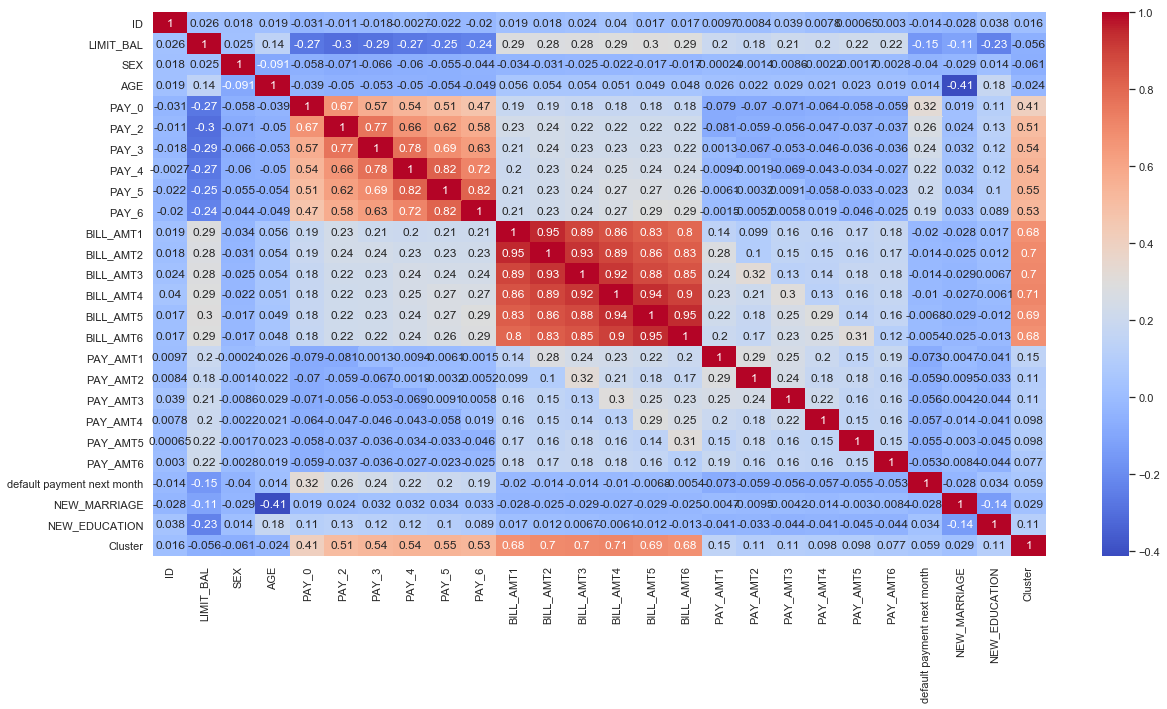

In [96]:
plt.figure(figsize=(20,10))
sns.set()
sns.heatmap(df_new.corr(),cmap='coolwarm',annot=True)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


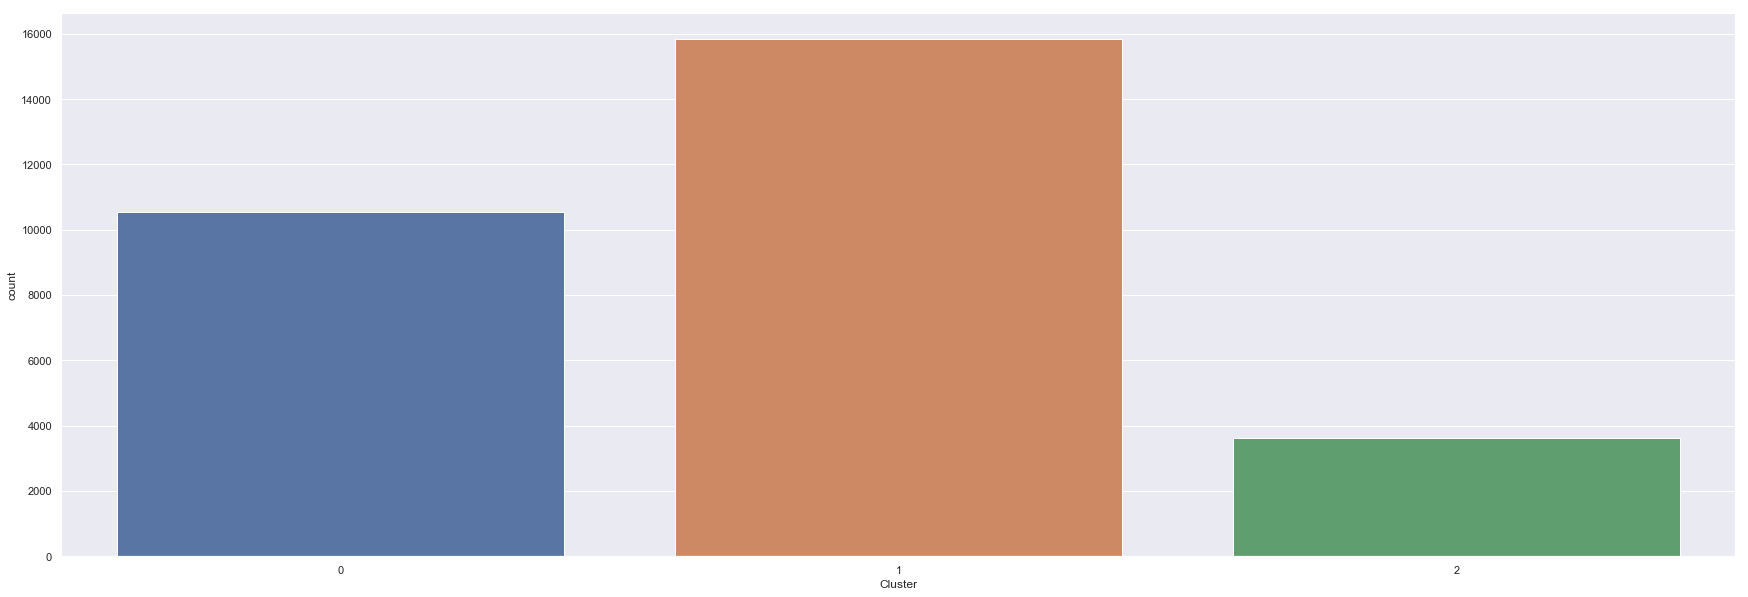

In [165]:
sns.set()
plt.figure(figsize=(30,10))
sns.countplot(df_new['Cluster'])

In [167]:
df_new['Cluster'].value_counts()

1    15850
0    10535
2     3615
Name: Cluster, dtype: int64

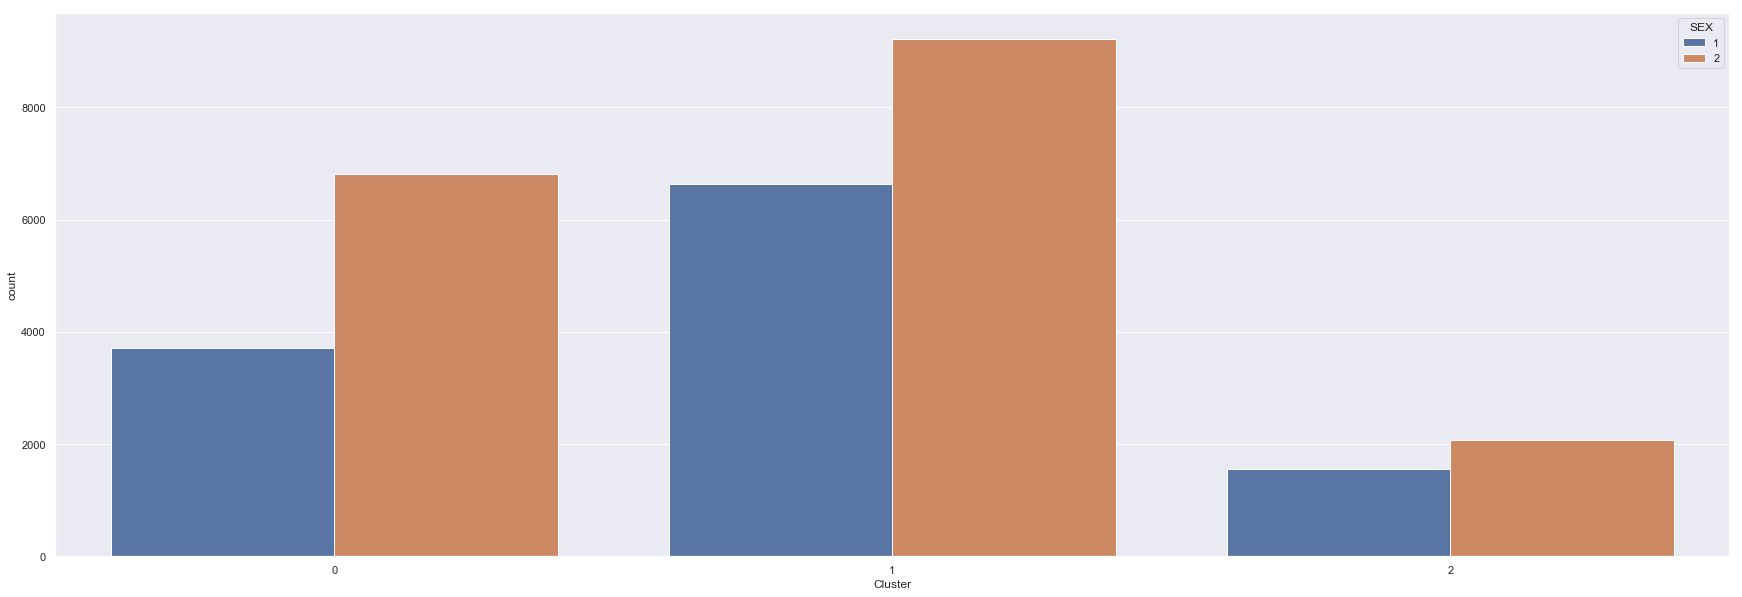

In [98]:
# Cluster berdasarkan gender
sns.set()
plt.figure(figsize=(30,10))
sns.countplot(x='Cluster',hue='SEX',data=df_new)

In [99]:
# Di setiap cluster perempuan memimpin sebagai jumlah terbanyak
# Dimana Cluster 1 sebagai pemuncak klasemen, diikuti dengan 0 dan 2

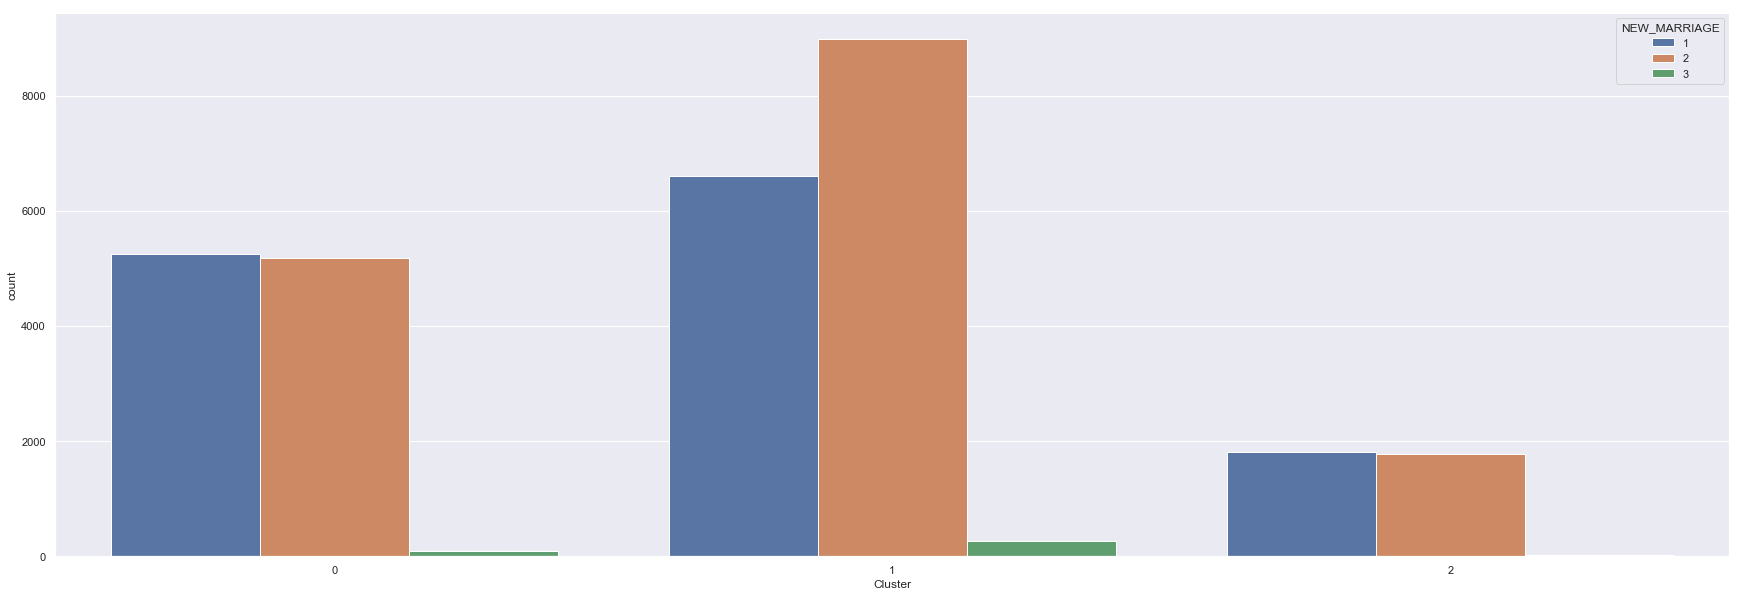

In [100]:
# Cluster berdasarkan pernikahan
sns.set()
plt.figure(figsize=(30,10))
sns.countplot(x='Cluster',hue='NEW_MARRIAGE',data=df_new)

In [ ]:
# Kategori pernikahan 3 (janda/duda/dll) sangat sedikit sekali sebarannya
# Di setiap cluster orang yang menikah dan single memiliki jumlah yang relatif sama, kecuali di CLuster 1
# orang yang single mengungguli dengan signifikan

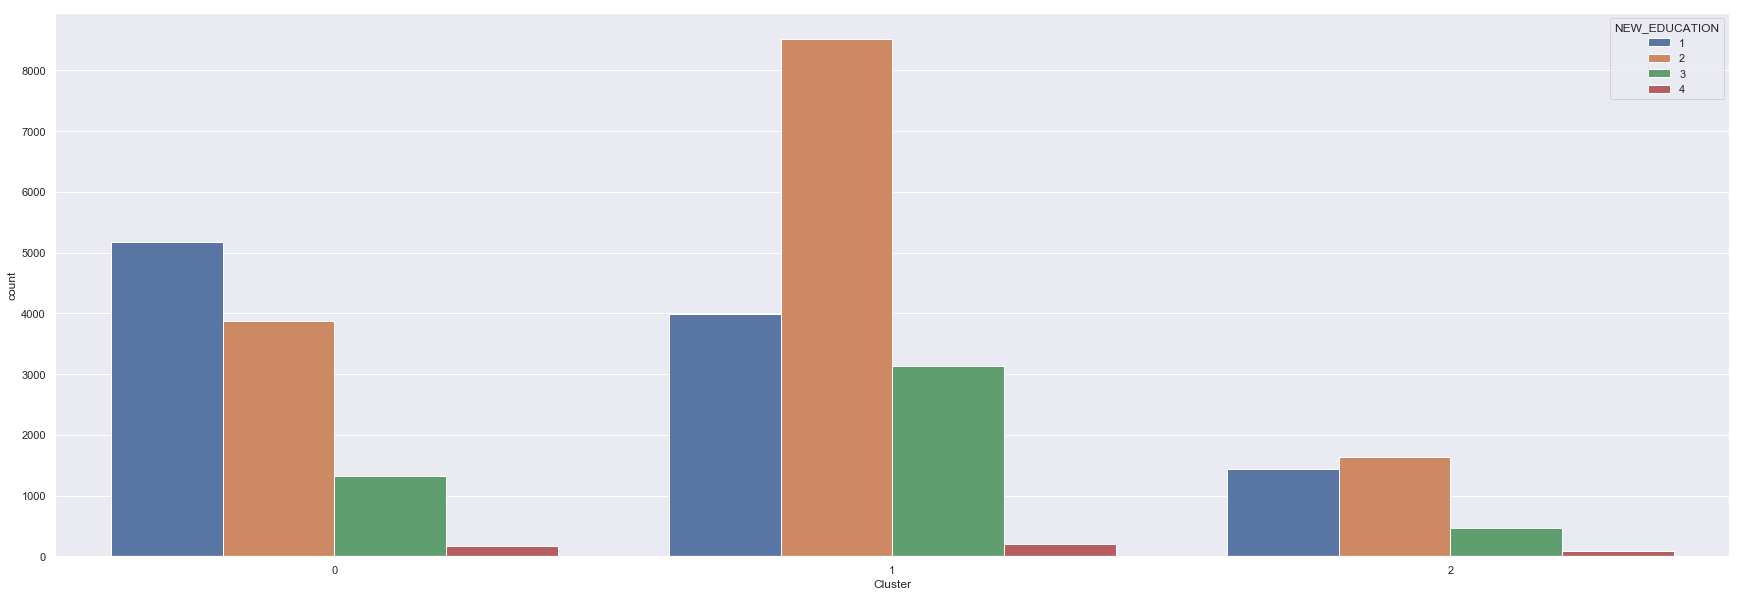

In [101]:
sns.set()
plt.figure(figsize=(30,10))
sns.countplot(x='Cluster',hue='NEW_EDUCATION',data=df_new)

In [102]:
# Pada cluster 0 memiliki kecenderungan semakin tinggi tingkat pendidikan maka jumlah customernya semakin banyak
# Untuk cluster 1 anomali terjadi pada lulusan S1 yang mengungguli dengan signifikan
# Sedangkan untuk cluster 2 lulusan S1 mengungguli lulusan S2 namun tidak terlalu signifikan

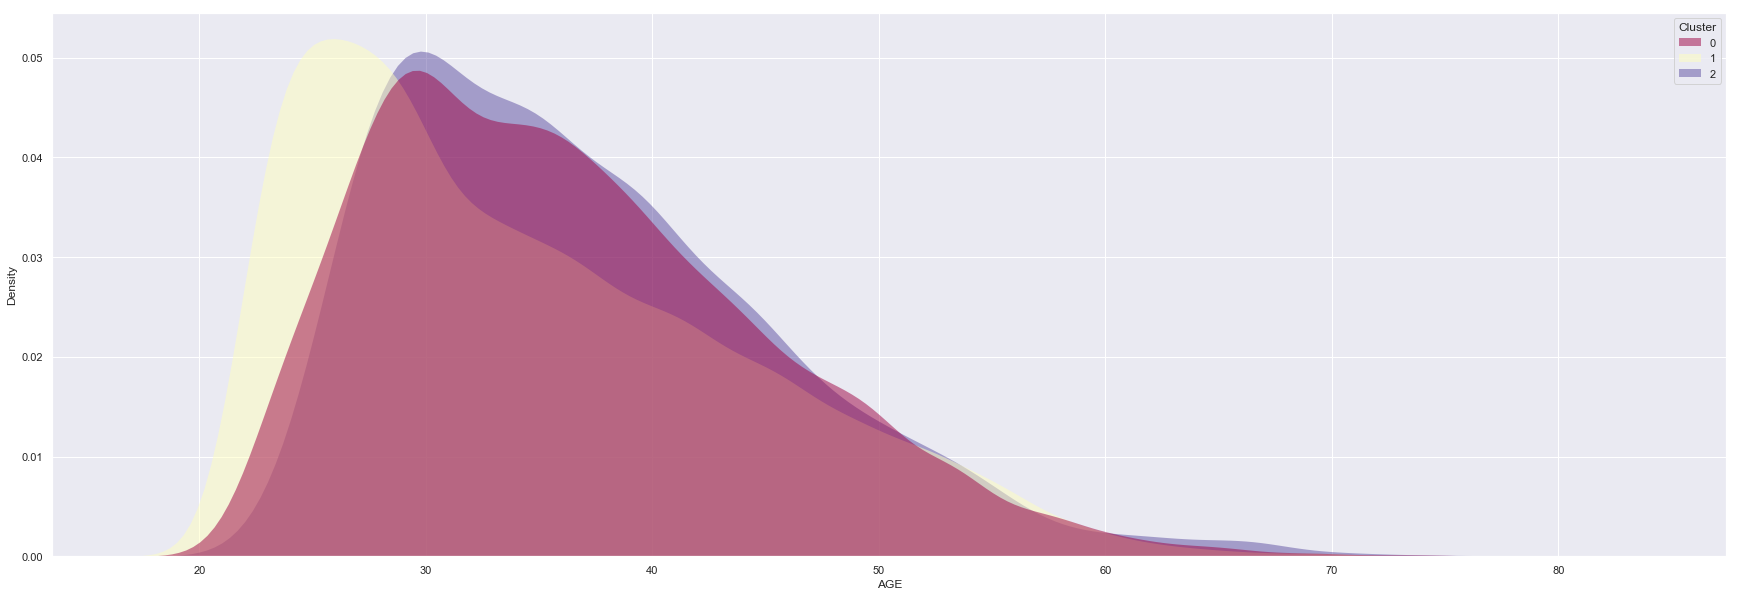

In [105]:
sns.set()
plt.figure(figsize=(30,10))
sns.kdeplot(
   data=df_new, x="AGE", hue="Cluster",
   fill=True, common_norm=False, palette="Spectral",
   alpha=.5, linewidth=0,
)

In [ ]:
# Setiap cluster memiliki distribusi yang skew kanan artinya memang mayoritas di setiap cluster, customer berada di usia produktif
# Dimana untuk cluster 1 cenderung berada pada usia 20-an (awal memulai karir)
# sedangkan cluster 2 dan 0 berada pada usia 30 (sedikit lebih senior) dengan cluster 2 sedikit lebih unggul

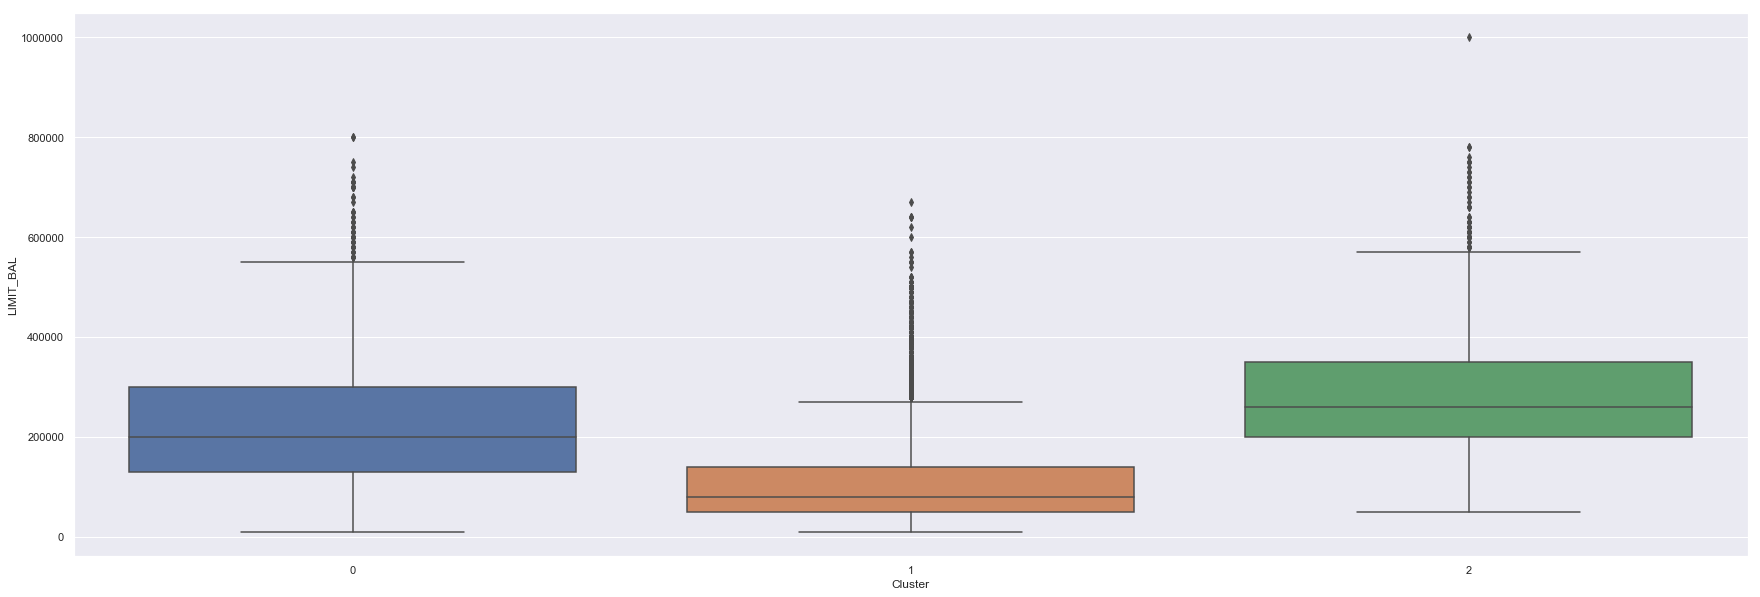

In [106]:
sns.set()
plt.figure(figsize=(30,10))
sns.boxplot(y='LIMIT_BAL',x='Cluster',data=df_new)

In [107]:
# Cluster 2 memiliki LIMIT_BAL paling tinggi, diikuti oleh cluster 0 dan cluster 1

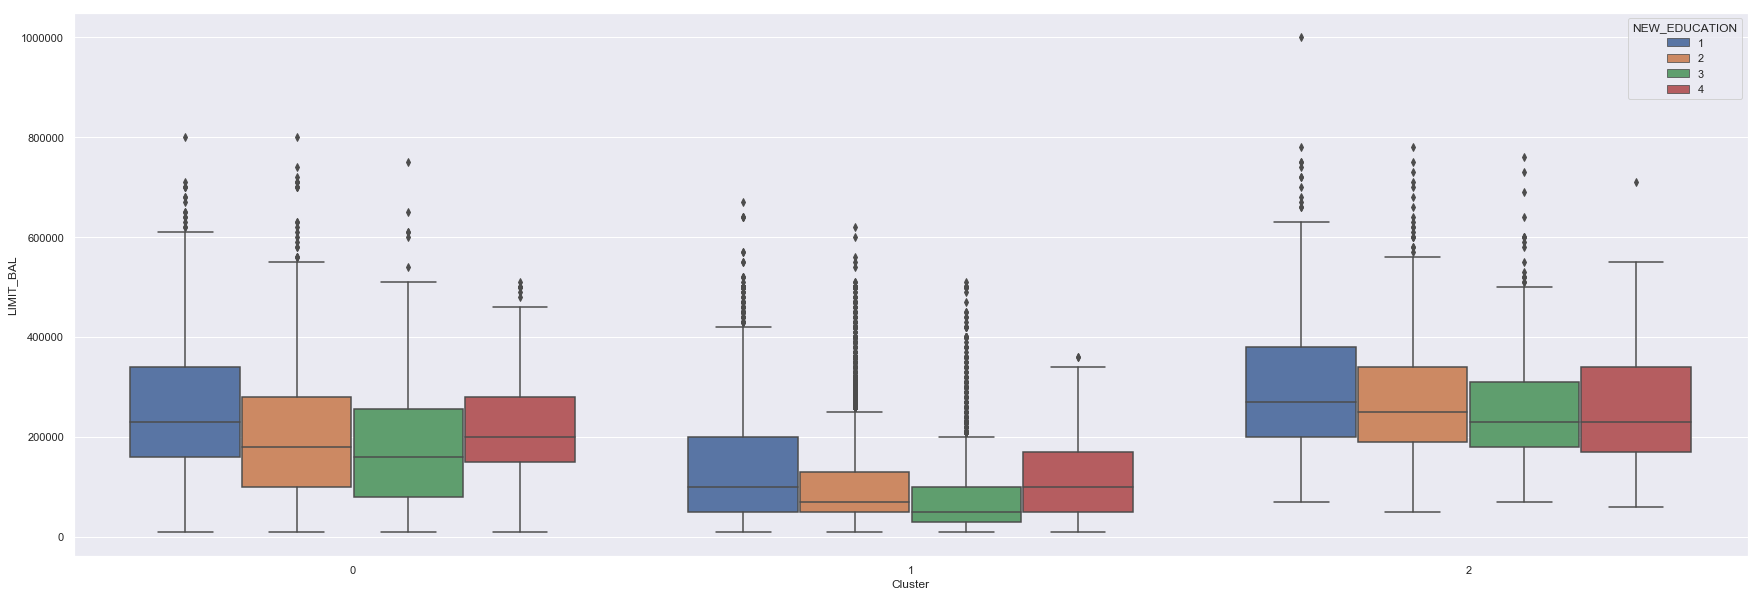

In [108]:
plt.figure(figsize=(30,10))
sns.boxplot(x='Cluster',y='LIMIT_BAL',hue='NEW_EDUCATION',data=df_new)

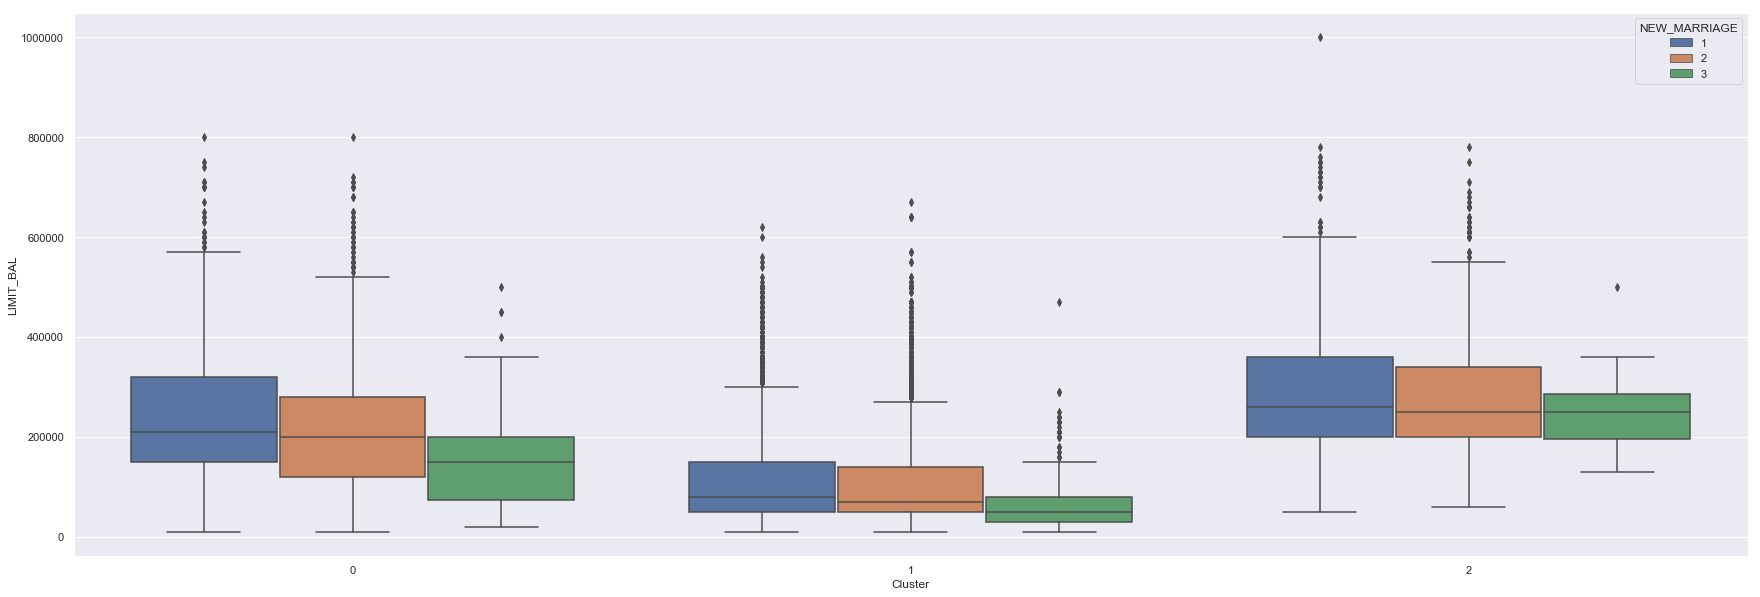

In [109]:
plt.figure(figsize=(30,10))
sns.boxplot(x='Cluster',y='LIMIT_BAL',hue='NEW_MARRIAGE',data=df_new)

In [ ]:
# Cluster 2 cenderung memiliki LIMIT_BAL lebih tinggi dan usia yang cukup senior namun
# tidak dalam ikatan pernikahan sehingga tidak memiliki banyak tanggungan
# Cluster 0 menyusul dengan LIMIT_BAL menengah dengan usia yang sama-sama senior
# tetapi karena berada dalam ikatan pernikahan sehingga tanggungan keluarga lebih besar dari cluster 2
# Cluster 1 mayoritas adalah lulusan S1 yang berada pada usia 25-an (awal karir)
# dengan kondisi masih single dan dengan demikian LIMIT_BAL tidak terlalu besar
# Setiap cluster didominasi oleh customer perempuan

<b>Melihat hubungan karakteristik bayar untuk setiap cluster</b>

In [118]:
df_new.groupby('Cluster')[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
Cluster,,,,,,
0,-0.764309,-1.147129,-1.223066,-1.265496,-1.272046,-1.271096
1,0.419243,0.459432,0.454196,0.389401,0.312492,0.263344
2,0.250622,0.218534,0.193638,0.149378,0.127801,0.133887


In [ ]:
# Cluster 0 cenderung rajin bayar diikuti oleh cluster 2 dan cluster 1
# Hal ini terjadi karena orang yang lebih dewasa cenderung lebih bijak dalam mengelola keuangan apalagi yang sudah menikah
# Sedangkan untuk mereka yang masih memulai karir akan cenderung lebih boros, apalagi dominasi customer perempuan
# yang secara kebutuhan relatif lebih banyak

In [119]:
df_new.groupby('Cluster')[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
Cluster,,,,,,
0,10173.870717,7794.211960,6768.408828,6143.615567,6334.676602,6529.143617
1,44694.294890,43059.065678,40736.787256,36843.716845,33834.481956,32556.094826
2,199478.181189,196617.991978,191815.042600,179583.006086,167726.050346,160817.200830


In [120]:
df_new.groupby('Cluster')[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
Cluster,,,,,,
0,4870.330422,5446.955861,5046.403987,4895.940959,4838.949881,5533.380256
1,3747.623155,3586.091041,3063.026625,2860.995142,2917.617603,3118.842461
2,16375.838728,17541.267497,15230.320055,13238.394191,12934.731120,13481.953804


In [121]:
df_new.groupby('Cluster')['LIMIT_BAL'].mean()

Cluster
0    220627.432368
1    105796.971609
2    283080.962656
Name: LIMIT_BAL, dtype: float64

In [ ]:
# Cluster 0 memiliki jumlah billing yang paling kecil namun diikuti dengan kemampuan bayar yang lebih teratur
# Cluster 1 memiliki jumlah billing yang lebih besar dengan pembayaran yang kurang teratur
# Cluster 2 memiliki jumlah billing yang paling besar dengan keteraturan bayar yang kurang lebih sama dengan cluster 1

<b>Feature Selection</b>

Melakukan pemilihan fitur-fitur yang paling berpengaruh terhadap model untuk memprediksi 3 cluster yang telah dibuat dengan menggunakan proses customer segmentation

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
X = df_new.drop(['default payment next month','ID','Cluster'],axis=1)
y = df_new['Cluster']

In [126]:
model = DecisionTreeClassifier()

In [127]:
model.fit(X,y)

DecisionTreeClassifier()

In [128]:
importance = model.feature_importances_

In [129]:
model.feature_importances_

array([0.02953211, 0.00088641, 0.0033476 , 0.01462394, 0.01471046,
       0.47777523, 0.02647978, 0.06420825, 0.01956976, 0.01371504,
       0.02027809, 0.01317137, 0.25449044, 0.0063385 , 0.01172563,
       0.00429814, 0.00334878, 0.00267232, 0.00666634, 0.00408962,
       0.00398011, 0.00116725, 0.00292483])

In [139]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'NEW_MARRIAGE', 'NEW_EDUCATION'],
      dtype='object')

In [144]:
type(X.columns)

pandas.core.indexes.base.Index

In [151]:
kolom = ['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'NEW_MARRIAGE', 'NEW_EDUCATION']

In [152]:
type(nama_kolom)

pandas.core.indexes.base.Index

In [153]:
nama_kolom = pd.Index(kolom)

In [154]:
nama_kolom

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'NEW_MARRIAGE', 'NEW_EDUCATION'],
      dtype='object')

In [155]:
data = pd.DataFrame(data=importance,index=nama_kolom,columns=['feature'])

In [161]:
data_baru = data.reset_index()
data_baru = data_baru.sort_values(by='feature',ascending=False)
data_baru

,index,feature
5,PAY_3,0.477775
12,BILL_AMT4,0.254490
7,PAY_5,0.064208
0,LIMIT_BAL,0.029532
6,PAY_4,0.026480
10,BILL_AMT2,0.020278
8,PAY_6,0.019570
4,PAY_2,0.014710
3,PAY_0,0.014624
9,BILL_AMT1,0.013715


In [162]:
data_baru.sum()

index      PAY_3BILL_AMT4PAY_5LIMIT_BALPAY_4BILL_AMT2PAY_...
feature                                                    1
dtype: object

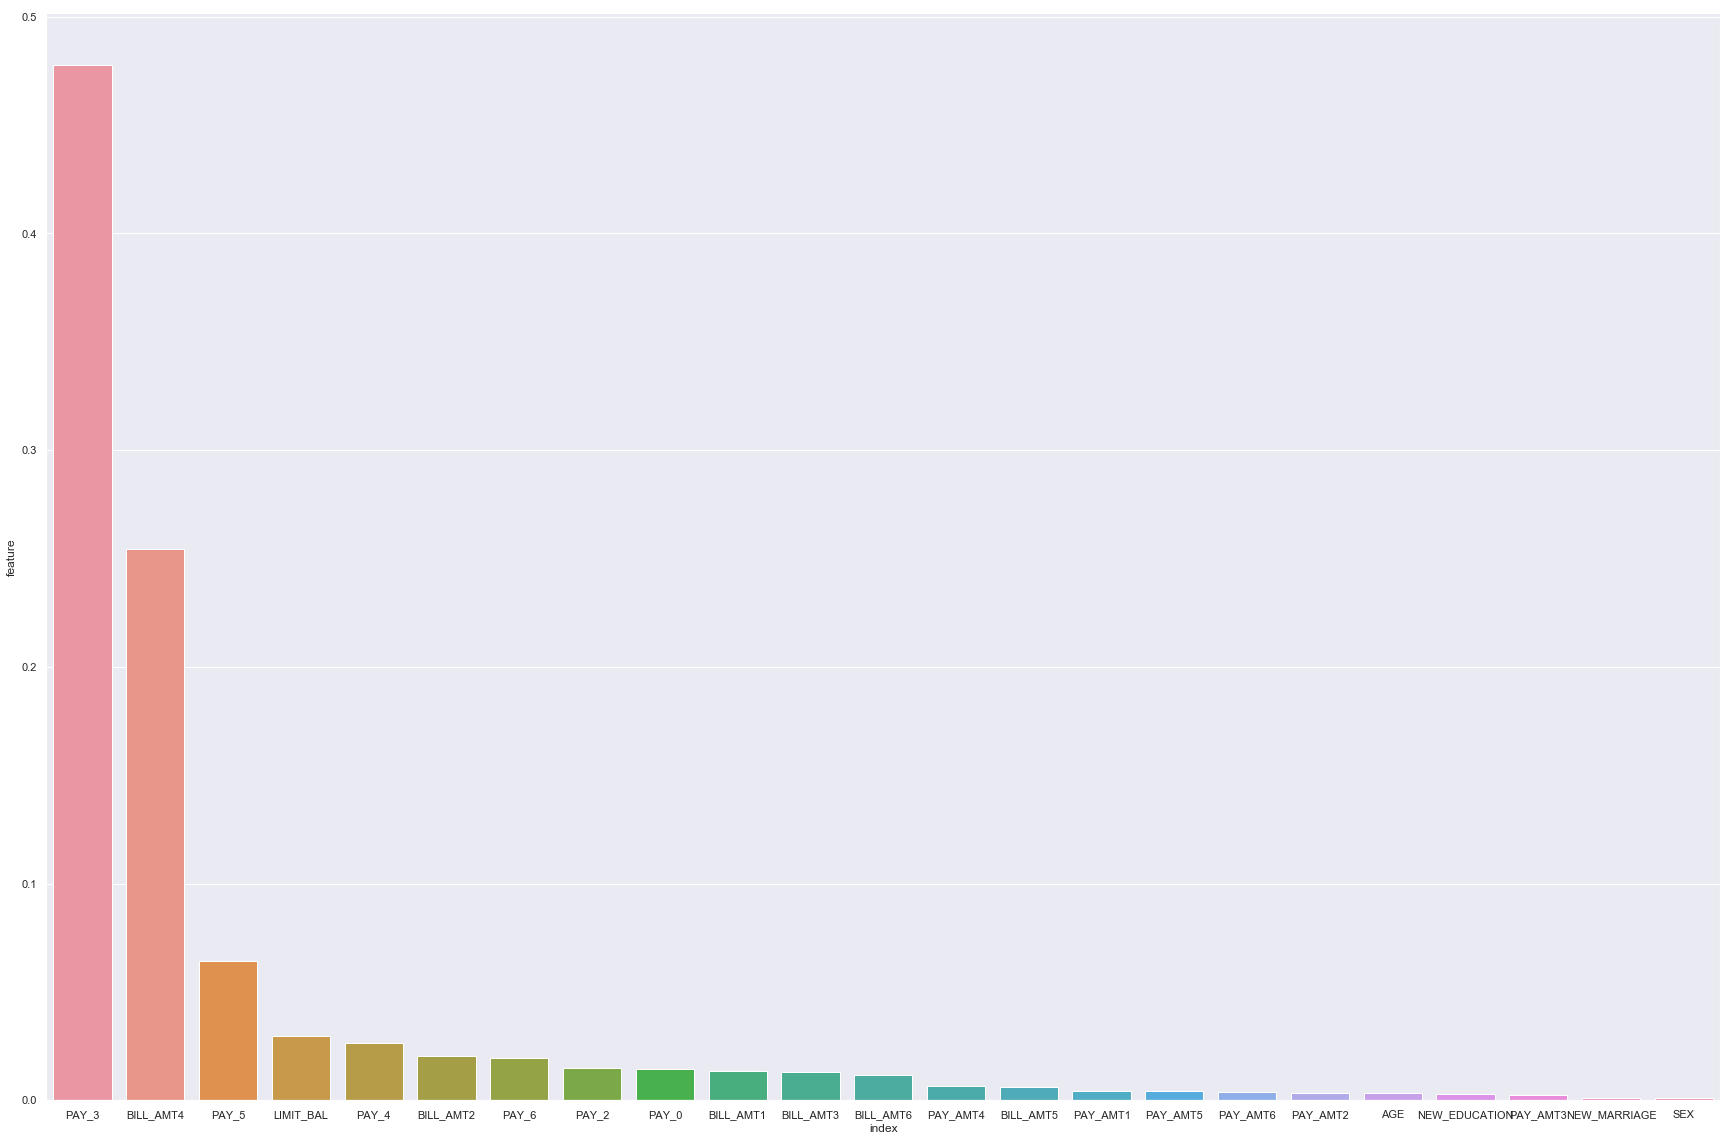

In [163]:
sns.set()
plt.figure(figsize=(30,20))
res=sns.barplot(x='index',y='feature',data=data_baru)

In [164]:
# Kita pilih PAY_3, BILL_AMT4, PAY_5, dan LIMIT_BAL karena menduduki sekitar 80% dari total feature importance

<b>Modeling dengan klasifikasi Naive-Bayes dibantu K-Fold Cross Validation</b>

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X = df_new[['PAY_3','BILL_AMT4','PAY_5','LIMIT_BAL']]
y = df_new['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [171]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [172]:
nb.fit(X_train,y_train)

GaussianNB()

In [173]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,f1_score,recall_score,precision_score

In [174]:
pred = nb.fit(X_train,y_train).predict(X_test)

In [176]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[2854  188   48]
 [ 583 4113  144]
 [  28   65  977]]


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3090
           1       0.94      0.85      0.89      4840
           2       0.84      0.91      0.87      1070

    accuracy                           0.88      9000
   macro avg       0.87      0.90      0.88      9000
weighted avg       0.89      0.88      0.88      9000



In [177]:
from sklearn.model_selection import KFold,cross_val_score

In [186]:
kfold = KFold(n_splits=3,shuffle=False)

In [187]:
kfold.split(X)

<generator object _BaseKFold.split at 0x0000023937B82570>

In [195]:
# Naive Bayes
accuracy_model = []
recall_model = []
precision_model = []
f1_score_model = []

for train_index, test_index in kfold.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    nb.fit(X_train,y_train)
    pred = nb.fit(X_train,y_train).predict(X_test)
    
    accuracy_model.append(accuracy_score(y_test, pred))
    recall_model.append(recall_score(y_test,pred,average='macro'))
    precision_model.append(precision_score(y_test,pred,average='macro'))
    f1_score_model.append(f1_score(y_test,pred,average='macro'))

In [197]:
print('Nilai akurasi',accuracy_model)
print('\n')
print('Nilai recall',recall_model)
print('\n')
print('Nilai presisi',precision_model)
print('\n')
print('Nilai f1',f1_score_model)

Nilai akurasi [0.8884, 0.8838, 0.8742]


Nilai recall [0.8951025200173935, 0.8970922954102849, 0.8945411077694745]


Nilai presisi [0.8742662513106132, 0.8644094884985067, 0.8618422513121596]


Nilai f1 [0.883899685940309, 0.8783348138134235, 0.8761120185778166]


C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


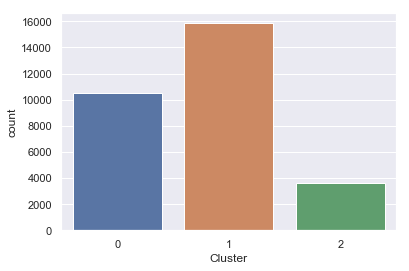

In [198]:
sns.countplot(df_new['Cluster'])

In [201]:
df_new['Cluster'].value_counts()

1    15850
0    10535
2     3615
Name: Cluster, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


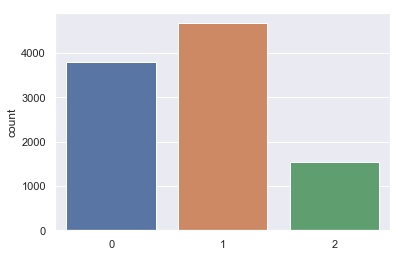

In [199]:
sns.countplot(pred)

In [202]:
pred.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'